In [1]:
from sklearn.datasets import make_blobs
X,y= make_blobs(n_samples=150,n_features=2,centers=3,cluster_std=0.5,random_state=0)

In [2]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
#n_init = 以獨立不同隨機選質心執行演算法10次，以最低SSE模型最為最終模型
#max_iter = 指定每次執行最大跌代次數
#tol = 控制聚類內誤差平方合的可以容許誤差
#某些情況下可能不會收斂，處理此問題的方法是選擇較大的 tol 值
# 在 Scikit-learn 的 k-means 實作中，若有聚類是空的，則演算法會找出與該“空聚類”質心最遠的點，
# 接著將該點重新設定為“空聚類的質心”
# 在使用“歐式距離”來計算時，要記得做標準化
y_km=km.fit_predict(X)
print("Distortion: %.2f"%km.inertia_)

Distortion: 72.48


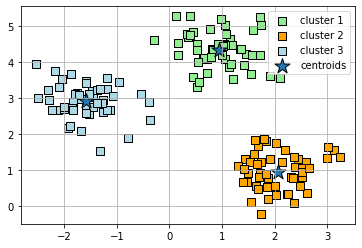

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,c='lightgreen',marker='s',edgecolor='black',label='cluster 1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,c='orange',marker='s',edgecolor='black',label='cluster 2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,c='lightblue',marker='s',edgecolor='black',label='cluster 3')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=250,marker='*',edgecolor='black',label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [4]:
from sklearn.cluster import KMeans
kmplus=KMeans(n_clusters=3,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
#init = 可以更變不同的方式
y_km=kmplus.fit_predict(X)
print("Distortion: %.2f"%kmplus.inertia_)

Distortion: 72.48


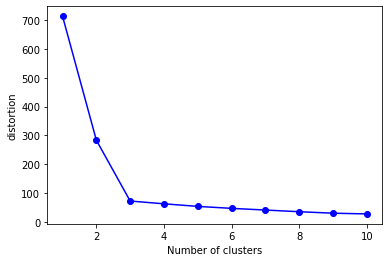

In [5]:
num_clusters=[x for x in range(1,11)]
distortion=[]

for k in num_clusters:
    kmplus=KMeans(n_clusters=k,init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=0)
    y_km=kmplus.fit_predict(X)
    distortion.append(kmplus.inertia_)

plt.plot(num_clusters,distortion,'b-o')
plt.xlabel("Number of clusters")
plt.ylabel("distortion")
plt.show()


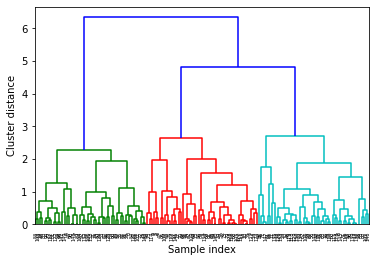

In [6]:
from scipy.cluster.hierarchy import linkage,dendrogram

Complete = linkage(X,method='complete',metric='euclidean')
dendrogram(Complete)
ax=plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

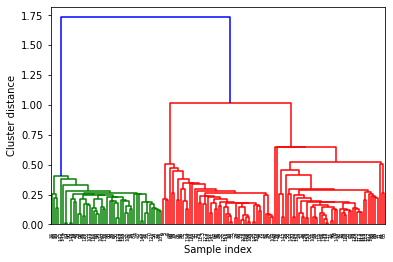

In [9]:
from scipy.cluster.hierarchy import linkage,dendrogram

Complete = linkage(X,method='single',metric='euclidean')
dendrogram(Complete)
ax=plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

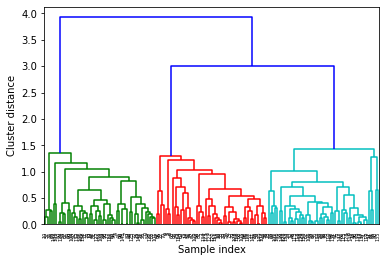

In [10]:
from scipy.cluster.hierarchy import linkage,dendrogram

Complete = linkage(X,method='average',metric='euclidean')
dendrogram(Complete)
ax=plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

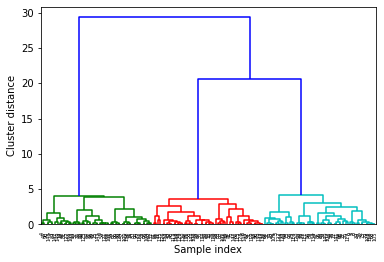

In [7]:
from scipy.cluster.hierarchy import ward,dendrogram
linkage=ward(X)
dendrogram(linkage)
ax=plt.gca()
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering,DBSCAN

ac=AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=3)

labels = ac.fit_predict(X)

db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)

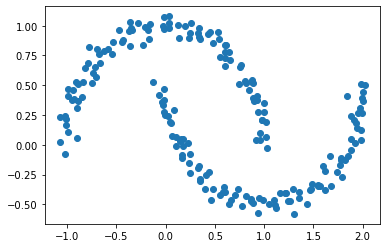

In [16]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show()

Text(0.5, 1.0, 'Agglomerative clustering')

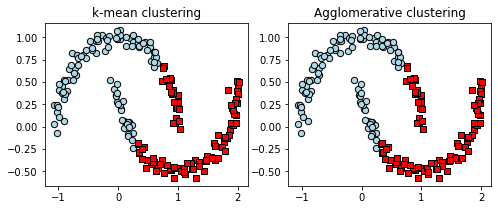

In [24]:
f,(ax1,ax2)=plt.subplots(1,2,figsize=(8,3))

km=KMeans(n_clusters=2,random_state=0)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0],X[y_km==0,1],edgecolor='black',c='lightblue',marker='o',s=40,label='cluster 1')
ax1.scatter(X[y_km==1,0],X[y_km==1,1],edgecolor='black',c='red',marker='s',s=40,label='cluster 2')
ax1.set_title('k-mean clustering')
ac= AgglomerativeClustering(linkage='complete',affinity='euclidean',n_clusters=2)
y_ac=ac.fit_predict(X)
ax2.scatter(X[y_km==0,0],X[y_km==0,1],edgecolor='black',c='lightblue',marker='o',s=40,label='cluster 1')
ax2.scatter(X[y_km==1,0],X[y_km==1,1],edgecolor='black',c='red',marker='s',s=40,label='cluster 2')
ax2.set_title('Agglomerative clustering')


Text(0.5, 1.0, 'DBSN clustering')

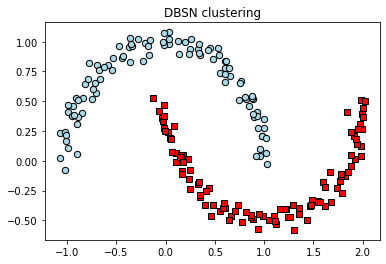

In [25]:
db=DBSCAN(eps=0.2,min_samples=5,metric='euclidean')
y_db=db.fit_predict(X)
plt.scatter(X[y_db==0,0],X[y_db==0,1],edgecolor='black',c='lightblue',marker='o',s=40,label='cluster 1')
plt.scatter(X[y_db==1,0],X[y_db==1,1],edgecolor='black',c='red',marker='s',s=40,label='cluster 2')
plt.title('DBSN clustering')